In [155]:
import csv
import numpy as np
import pyomo
import pandas as pd
import pulp
import matplotlib.pyplot as plt

<H2> Exercise 8</H2>
<p> in this task we will be recreating a boreal forest multiobjective optimization problem </p> 
<p> This problem and the data used in it can be found in couple different research papers: </p>
<li>  https://jyx.jyu.fi/bitstream/handle/123456789/59987/book%20chapterfinal%20version.pdf?sequence=1&isAllowed=y </li>
<li> https://jyx.jyu.fi/bitstream/handle/123456789/51834/trivioetal2016jofappliedecology.pdf?sequence=1&isAllowed=y </li>
<li> https://jyx.jyu.fi/bitstream/handle/123456789/66476/19hakanenetalfinal.pdf?sequence=1&isAllowed=y </li>

<p> In these papers a boreal forest multiobjective optimization problem was studied. </p> 

where coefficient $𝑐𝑠𝑟$
is the contribution of the s-th stand to the value of i-th objective in the case
where the r-th management regime is selected. In other words, for each forest stand s and each
management regime r, the coefficients describe the following outcomes of managing stand s with
regime r:

<li> $c_{sr}^{(1)}$
– timber harvest revenues from the stand; </li> 
<li> $c_{sr}^{(2)}$
– amount of carbon stored by the stand; </li> 
<li> $c_{sr}^{(3)}$
– the indicator of stand's contribution to the biodiversity of the landscape (volume of
deadwood or the combined habitat availability). </li>

<p> This multiobjective optimization problem can be written as follows: </p> 

$$
\begin{equation}
\begin{aligned}
\begin{cases}
\max  & f_1(x, c) = z \\
\max & f_2(x, c) = z \\
\max  & f_3(x, c) = z \\
\text{s.t.} \qquad &  \sum_{i=1}^n x_{ij1} = 1 \\
\end{cases}
\end{aligned}
\end{equation}
$$

<p> C is the data matrix and all of the objective functions follow same linear equation as follows: </p>

$$
\begin{equation}
\begin{aligned}
 & z = \sum_{i=1}^n \sum_{j=1}^m x_{ij1} c_{ij}\\
\qquad  &  \\
\end{aligned}
\end{equation}
$$

<p> We will load the data using pandas from 4 different datasets: </p>

In [120]:
df = pd.read_csv("/Users/sepuliini/Desktop/Demot/study_10064/Carbon_storage.csv", header=0)
#df = df[:100]
df.dropna(axis=0, inplace=True)
c0 = df.values

In [121]:
df = pd.read_csv("/Users/sepuliini/Desktop/Demot/study_10064/Combined_HA.csv", header=0)
#df = df[:100]
df.dropna(axis=0, inplace=True)
c3 = df.values

In [122]:
df = pd.read_csv("/Users/sepuliini/Desktop/Demot/study_10064/Deadwood_volume.csv", header=0)
#df = df[:100]
df.dropna(axis=0, inplace=True)
c1 = df.values

In [123]:
df = pd.read_csv("/Users/sepuliini/Desktop/Demot/study_10064/Timber_revenues.csv", header=0)
#df = df[:100]
df.dropna(axis=0, inplace=True)
c2 = df.values

<p> For testing purposes we can solve this optimization problem as a signle linear problem using pulp as follows and no constraints: </p>

In [152]:
c_list = [c0, c2, c3]
for c in c_list:
    #Define the problem as a maximization problem
    problem = pulp.LpProblem("Forest Planning Problem", pulp.LpMaximize)

    #Define the decision variables
    n = len(c) #number of management units
    m = len(c[0]) #number of scenarios
    x = pulp.LpVariable.dicts("x", [(i,j) for i in range(n) for j in range(m)], cat="Binary")

    #Define the objective function
    objective = pulp.lpSum(c[i][j]*x[(i,j)] for i in range(n) for j in range(m))
    problem += objective

    #Define the constraints
    for i in range(n):
        problem += pulp.lpSum(x[(i,j)] for j in range(m)) == 1
    
    #help(problem)
    #Solve the problem
    res = problem.solve()


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sepuliini/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/hb/gmvzq0r55w57wd0m_4djf02m0000gn/T/150b6ab37f6942f48129dc3e723679c3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/hb/gmvzq0r55w57wd0m_4djf02m0000gn/T/150b6ab37f6942f48129dc3e723679c3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 16798 COLUMNS
At line 487003 RHS
At line 503797 BOUNDS
At line 621349 ENDATA
Problem MODEL has 16793 rows, 117551 columns and 117551 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 3.16433e+06 - 0.49 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from -3.16433e+06 to -1.79769e+308
Probing was tri

<h3> Multiobjective problem </h3>
<p> As a multiobjective problem I made this into a 3 different function and solved it using pulp.  </p> 

In [151]:
#Define the decision variables
n = len(c0) # number of management units
m = len(c0[0]) # number of scenarios
#model.x = pyo.Var([(i,j) for i in range(n) for j in range(m)], within=pyo.Binary)
x = pulp.LpVariable.dicts("x", [(i,j) for i in range(n) for j in range(m)], cat="Binary")


f1 = pulp.lpSum(c2[0][j] * x[(i,j)] for i in range(n) for j in range(m))
f2 = pulp.lpSum(c0[1][j] * x[(i,j)] for i in range(n) for j in range(m))
f3 = pulp.lpSum(c3[2][j] * x[(i,j)] for i in range(n) for j in range(m))

#Define the constraint
for i in range(n):
    constraint = pulp.lpSum(x[(i,j)] for j in range(m)) == 1
    problem += constraint

# Define the problem as a multi-objective problem
problem = pulp.LpProblem("Multi-Objective Problem", pulp.LpMaximize)
problem += f1
problem += f2
problem += f3

#Solve the problem
solution = pulp.LpStatus[problem.solve()]
#print("Solution status:", solution)

#Print the optimal values of the decision variables
#for v in problem.variables():
#    print(v.name, "=", v.varValue)
    
#Print the optimal values of the objective functions
print("f1 =", pulp.value(f1))
print("f2 =", pulp.value(f2))
print("f3 =", pulp.value(f3))


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sepuliini/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/hb/gmvzq0r55w57wd0m_4djf02m0000gn/T/24bf5537d1664be9880e4d3faccb8ab7-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/hb/gmvzq0r55w57wd0m_4djf02m0000gn/T/24bf5537d1664be9880e4d3faccb8ab7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 5 COLUMNS
At line 352659 RHS
At line 352660 BOUNDS
At line 470212 ENDATA
Problem MODEL has 0 rows, 117551 columns and 0 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 113265 - 0.01 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from -113265 to -1.79769e+308
Probing was tried 0 times and created 

<p> Hard part for this exercise was that I was that familiar with using data matrixes as inputs.Other problem was the amount of data. 
    
And even though I happened to be able to use them with pulp I'm not sure if the functions are correctly optimized as results are hard to interpret and I am not that familiar with multiobjective optimization yet. </p>

In [157]:
#Define the decision variables
n = len(c0) # number of management units
m = len(c0[0]) # number of scenarios
x = pulp.LpVariable.dicts("x", [(i,j) for i in range(n) for j in range(m)], cat="Binary")

#Define the objective functions
f1 = pulp.lpSum(c2[0][j] * x[(i,j)] for i in range(n) for j in range(m))
f2 = pulp.lpSum(c0[1][j] * x[(i,j)] for i in range(n) for j in range(m))
f3 = pulp.lpSum(c3[2][j] * x[(i,j)] for i in range(n) for j in range(m))

# efine the constraints
for i in range(n):
    constraint = pulp.lpSum(x[(i,j)] for j in range(m)) == 1
    problem += constraint

#Define the problem as a multi-objective problem
problem = pulp.LpProblem("Multi-Objective Problem", pulp.LpMaximize)
problem += f1
problem += f2
problem += f3

#Define a list of weights to use for the weighted sum approach
#With better weights we could get better pareto front for the problem.
#But know what kind of weights to use is hard and it might require some more knowledge of the topic
weights = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (0.5, 0.5, 0), (0, 0.5, 0.5), (0.5, 0, 0.5), (1, 1, 1)]

#Solve a series of single-objective optimization problems using the weighted sum approach
pareto_front = []
for w in weights:
    problem.objective = pulp.lpSum([w[0]*f1, w[1]*f2, w[2]*f3])
    solution = problem.solve()
    #Get the values of the objective functions
    obj_values = [pulp.value(f1), pulp.value(f2), pulp.value(f3)]
    #Replace None values with 0
    obj_values = [0 if val is None else val for val in obj_values]
    pareto_front.append(tuple(obj_values))


#Print the points on the Pareto front
print("Pareto front:")
for point in pareto_front:
    if point == None:
        point = 0
    print(point)


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sepuliini/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/hb/gmvzq0r55w57wd0m_4djf02m0000gn/T/8ab29cf8c3d446f3b67781e816108fea-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/hb/gmvzq0r55w57wd0m_4djf02m0000gn/T/8ab29cf8c3d446f3b67781e816108fea-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 5 COLUMNS
At line 302280 RHS
At line 302281 BOUNDS
At line 403040 ENDATA
Problem MODEL has 0 rows, 100758 columns and 0 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 1.33188e+08 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from -1.33188e+08 to -1.79769e+308
Probing was tried 0 times an

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/sepuliini/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/hb/gmvzq0r55w57wd0m_4djf02m0000gn/T/b8bdef662c6b460087b5f075c57fec54-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/hb/gmvzq0r55w57wd0m_4djf02m0000gn/T/b8bdef662c6b460087b5f075c57fec54-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 5 COLUMNS
At line 352659 RHS
At line 352660 BOUNDS
At line 470212 ENDATA
Problem MODEL has 0 rows, 117551 columns and 0 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 7.58575e+06 - 0.01 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from -7.58575e+06 to -1.79769e+308
Probing was tried 0 times an

x:  [133187634.02001746, 133187634.02001746, 133187634.02001746, 133187634.02001746, 133187634.02001746, 133187634.02001746, 133187634.02001746]
y:  [0, 15058232.72098122, 15058232.72098122, 15058232.72098122, 15058232.72098122, 15058232.72098122, 15058232.72098122]
z:  [0, 113264.88902395709, 113264.88902395709, 113264.88902395709, 113264.88902395709, 113264.88902395709, 113264.88902395709]


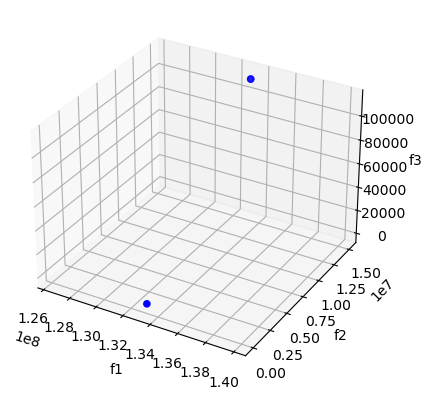

In [158]:
x = [point[0] for point in pareto_front]
y = [point[1] for point in pareto_front]
z = [point[2] for point in pareto_front]

print("x: ", x)
print("y: ", y)
print("z: ", z)

# Plot the Pareto front
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='o')
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('f3')
#plt.plot(133187634.02001746, 15058232.72098122, 113264.88902395709)
plt.show()